In [0]:
!pip install image-classifiers

     |████████████████████████████████| 81kB 5.2MB/s 


In [0]:
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-c2_612pl
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-c2_612pl
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-tm7ekfur/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [0]:
from classification_models.resnet import ResNet18, preprocess_input

#model = ResNet18((32, 32, 3), weights='imagenet',include_top=False,classes=10)

Using TensorFlow backend.


In [0]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import keras
from keras.applications.imagenet_utils import decode_predictions



In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
from keras.utils import np_utils
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
input1=train_features

In [0]:
x=train_features
print(x.shape)

(50000, 32, 32, 3)


In [0]:
y=train_labels
print(y.shape)

(50000, 10)


In [0]:
n_classes = 10

In [0]:
# build model
from keras.layers import Reshape, Activation, Conv2D
base_model = ResNet18(input_shape=(32,32,3), weights='imagenet', include_top=False)
x=Conv2D(n_classes, (1,1), strides=(1,1), padding='same', name='conv_1', use_bias=False)(base_model.output)
x = keras.layers.GlobalAveragePooling2D()(x)
output = Activation('softmax')(x)

model = keras.models.Model(inputs=[base_model.input], outputs=[output])


W0702 11:45:02.284735 139865550526336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 11:45:02.345872 139865550526336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 11:45:02.347043 139865550526336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0702 11:45:02.348521 139865550526336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0702 11:45:02.351403 139865

44924928/44920640 [==============================] - 2s 0us/step


In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

In [0]:
# train
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])


W0702 11:45:32.967747 139865550526336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd /content/gdrive/My Drive/AssignmentEIP4

/content/gdrive/My Drive/AssignmentEIP4


In [0]:
from keras.callbacks import *
filepath="/content/gdrive/My Drive/AssignmentEIP4/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

In [0]:
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 5,
                                 callbacks=[checkpoint],validation_data = (test_features, test_labels), verbose=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=0, steps_per_epoch=390, epochs=5)`
  This is separate from the ipykernel package so we can avoid doing imports until
W0702 11:46:15.496580 139865550526336 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/te


Epoch 00001: val_acc improved from -inf to 0.68830, saving model to /content/gdrive/My Drive/AssignmentEIP4/epochs:001-val_acc:0.688.hdf5

Epoch 00002: val_acc improved from 0.68830 to 0.73320, saving model to /content/gdrive/My Drive/AssignmentEIP4/epochs:002-val_acc:0.733.hdf5

Epoch 00003: val_acc improved from 0.73320 to 0.75450, saving model to /content/gdrive/My Drive/AssignmentEIP4/epochs:003-val_acc:0.754.hdf5

Epoch 00004: val_acc improved from 0.75450 to 0.76380, saving model to /content/gdrive/My Drive/AssignmentEIP4/epochs:004-val_acc:0.764.hdf5

Epoch 00005: val_acc improved from 0.76380 to 0.76410, saving model to /content/gdrive/My Drive/AssignmentEIP4/epochs:005-val_acc:0.764.hdf5


In [0]:
#model.fit(input1, y,batch_size=128,nb_epoch=5, verbose=1,callbacks=[checkpoint],validation_data=(test_features,test_labels))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0701 16:02:08.135584 140557987362688 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 23s 453us/step - loss: 1.1913 - acc: 0.5916 - val_loss: 0.9160 - val_acc: 0.6856

Epoch 00001: val_acc improved from -inf to 0.68560, saving model to /content/gdrive/My Drive/AssignmentEIP4/epochs:001-val_acc:0.686.hdf5
Epoch 2/5
50000/50000 [==============================] - 16s 316us/step - loss: 0.7362 - acc: 0.7447 - val_loss: 0.7926 - val_acc: 0.7250

Epoch 00002: val_acc improved from 0.68560 to 0.72500, saving model to /content/gdrive/My Drive/AssignmentEIP4/epochs:002-val_acc:0.725.hdf5
Epoch 3/5
50000/50000 [==============================] - 16s 320us/step - loss: 0.5779 - acc: 0.8001 - val_loss: 0.7190 - val_acc: 0.7540

Epoch 00003: val_acc improved from 0.72500 to 0.75400, saving model to /content/gdrive/My Drive/AssignmentEIP4/epochs:003-val_acc:0.754.hdf5
Epoch 4/5
50000/50000 [==============================] - 16s 322us/step - loss: 0.4622 - acc: 0.8409 - val_loss: 

In [0]:
model.load_weights('epochs:005-val_acc:0.764.hdf5')

In [0]:

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)
validation_data = datagen.flow(test_features, test_labels,batch_size=128,shuffle=False)

In [0]:
Y_pred = model.predict_generator(validation_data, steps=np.ceil(test_features.shape[0]/128), verbose=0)
y_pred = np.argmax(Y_pred, axis=1)

In [0]:
import pandas as pd
d = {'pred': np.argmax(Y_pred,axis=1), 'true': np.argmax(test_labels,axis=1)} #axis=1!important!
df = pd.DataFrame(data=d)

#looking at wrong predicted values(For 1! you can change it.)
#array1 = np.array(df[(df.pred != df.true) & (df.true==1)].index)
#print(array1)

# shows total mistakes
df2 = df[(df.pred != df.true)]
df2

df2.shape

(2359, 2)

In [0]:
df2

,pred,true
0,5,3
3,8,0
15,6,8
24,4,5
26,7,4
35,6,2
37,9,1
42,7,5
51,9,8
58,5,4


In [0]:
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

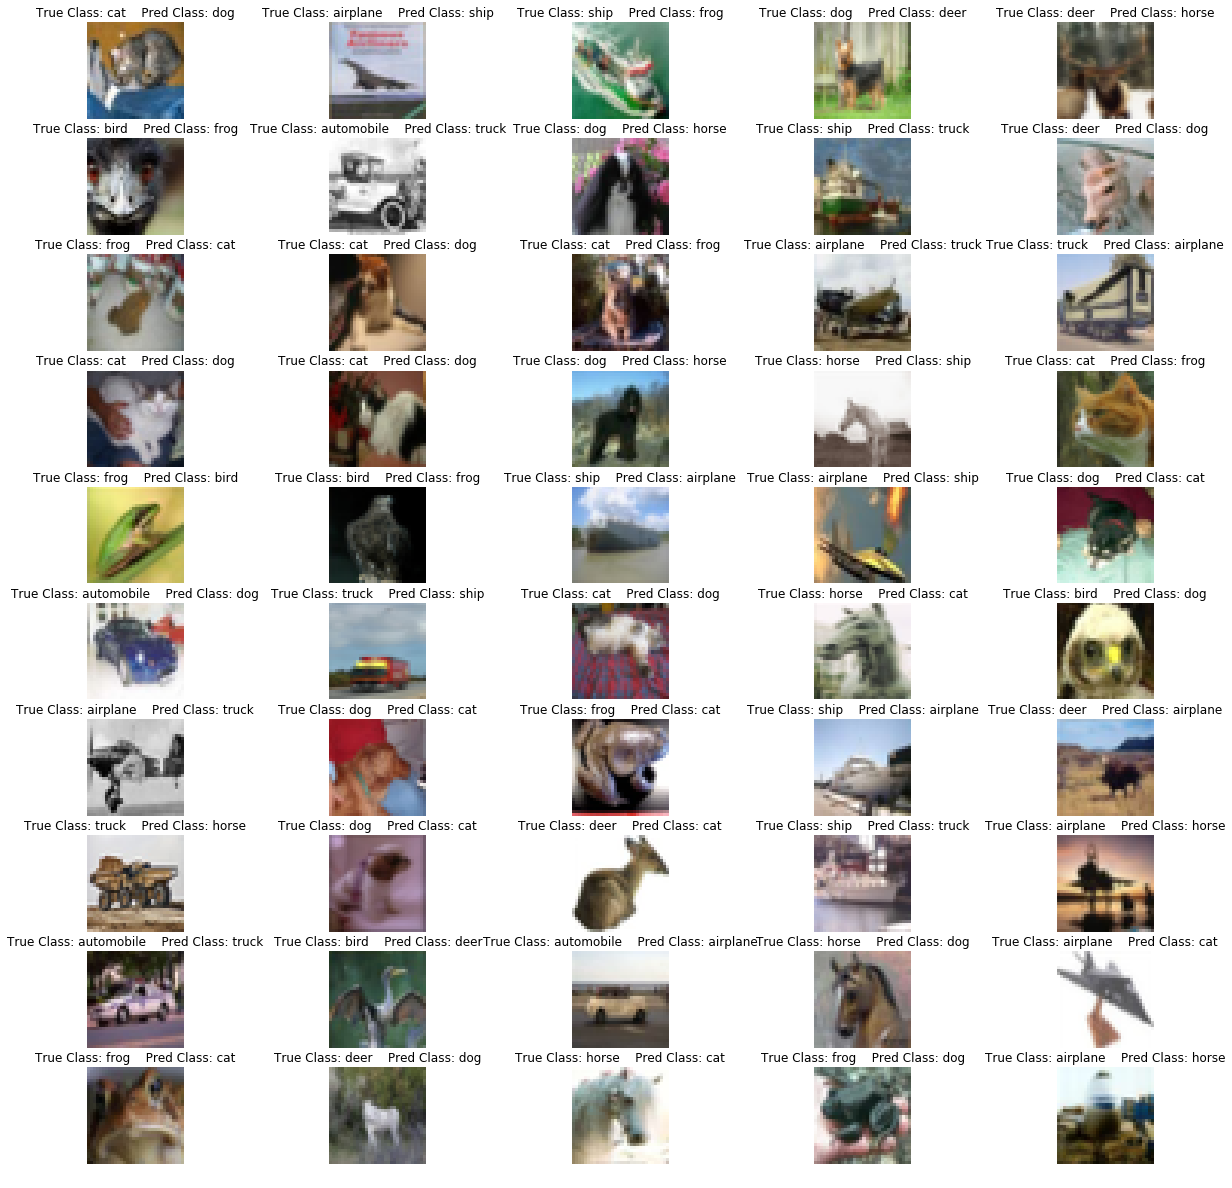

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize = (21,21))

for i in range(50):
    plt.subplot(10,5,i+1)
    img = test_features[df2.index[i]]
    #img = img.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.title("True Class: " + str(labels[df2["true"].iloc[i]])+"    Pred Class: " + str(labels[df2["pred"].iloc[i]]))
    plt.axis('off')
    
plt.show()


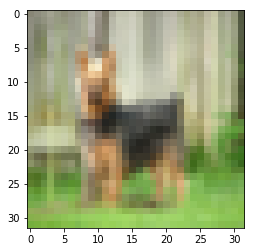

In [0]:
plt.imshow(test_features[24])

In [0]:
list(test_labels[24])

[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

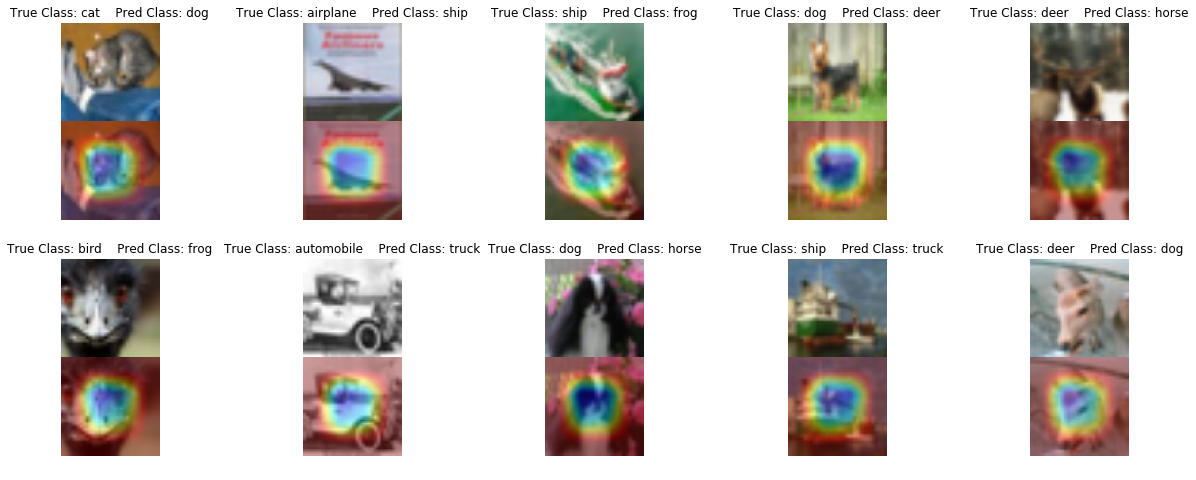

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
import keras.backend as K
import numpy as np
import cv2
import sys

plt.figure(figsize = (21,21))

for i in range(10):
    plt.subplot(5,5,i+1)
    #ax1, ax2 = axes
    #plt.imshow(test_features[df2.index[i]])
    img = test_features[df2.index[i]]
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    class_idx = np.argmax(preds[0])
    class_output = model.output[:, class_idx]
    last_conv_layer = model.get_layer("zero_padding2d_15")
    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for j in range(256):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[j]
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    img= cv2.resize(img,(224,224))
    superimposed_img= cv2.resize(superimposed_img,(224,224))
    final = np.concatenate((img, superimposed_img), axis = 0)
    #cv2_imshow(img)
    #cv2_imshow(superimposed_img)
    #cv2.waitKey(0)
    #img = img.reshape((28,28))
    plt.imshow(final)
    #plt.subplot(5, 5, i+1), plt.imshow(superimposed_img)
    #plt.imshow(img)
    #plt.subplot(5,5,i+1)
    #plt.imshow(superimposed_img)
    plt.title("True Class: " + str(labels[df2["true"].iloc[i]])+"    Pred Class: " + str(labels[df2["pred"].iloc[i]]))
    plt.axis('off')
    
plt.show()

##This one is for the GRADCAM implementation for 50 images in the gallery

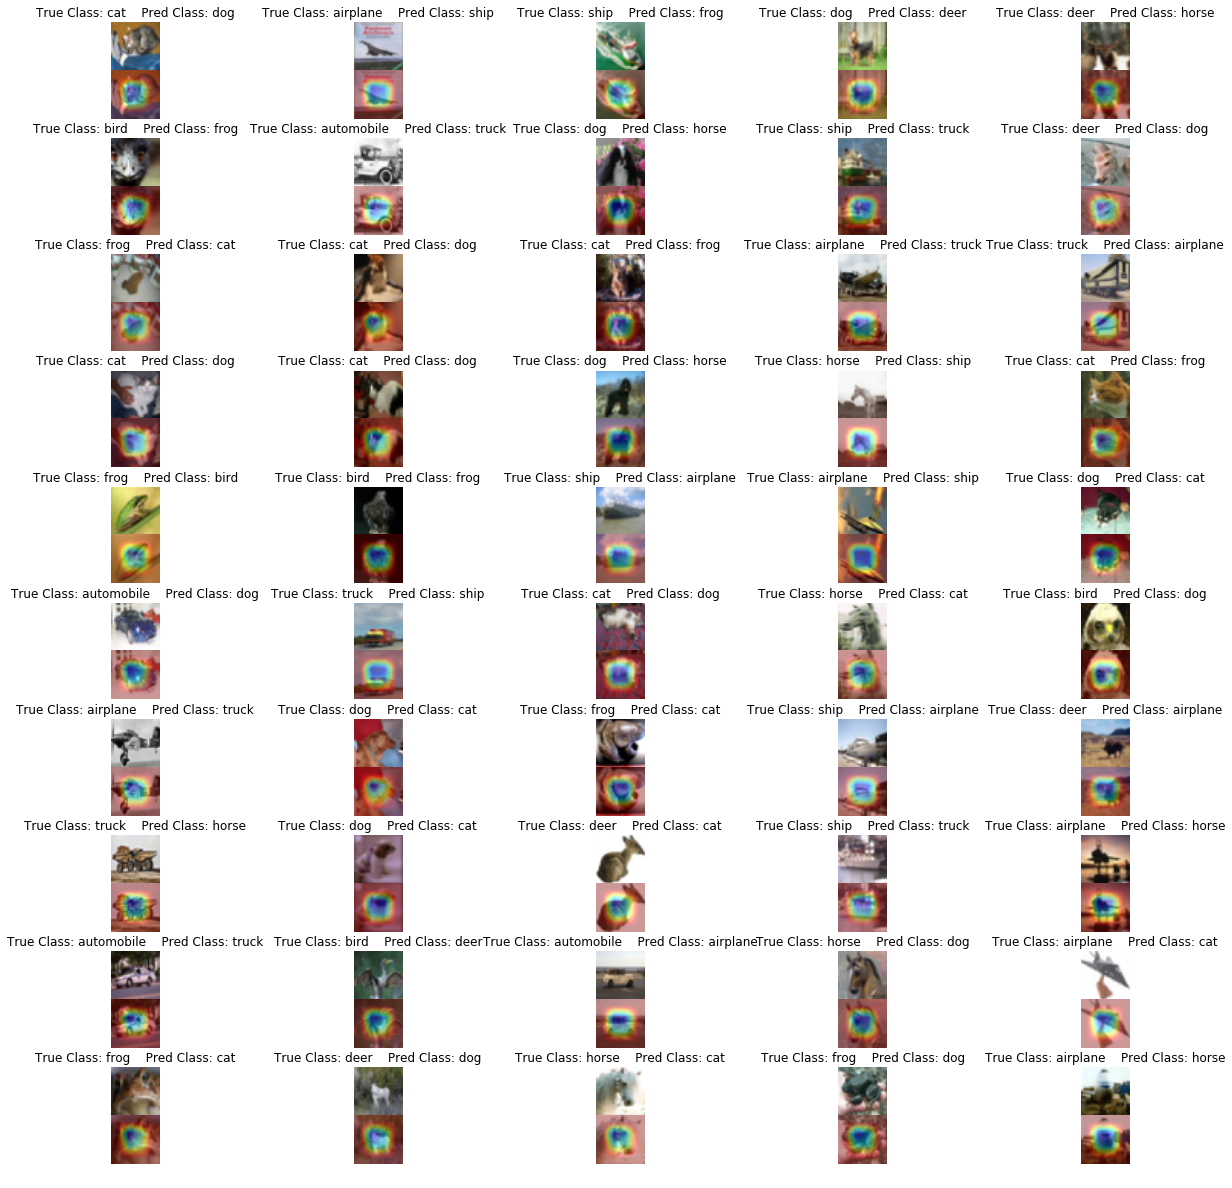

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
import keras.backend as K
import numpy as np
import cv2
import sys

plt.figure(figsize = (21,21))

for i in range(50):
    plt.subplot(10,5,i+1)
    #ax1, ax2 = axes
    #plt.imshow(test_features[df2.index[i]])
    img = test_features[df2.index[i]]
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    class_idx = np.argmax(preds[0])
    class_output = model.output[:, class_idx]
    last_conv_layer = model.get_layer("zero_padding2d_15")
    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for j in range(256):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[j]
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    img= cv2.resize(img,(224,224))
    superimposed_img= cv2.resize(superimposed_img,(224,224))
    final = np.concatenate((img, superimposed_img), axis = 0)
    #cv2_imshow(img)
    #cv2_imshow(superimposed_img)
    #cv2.waitKey(0)
    #img = img.reshape((28,28))
    plt.imshow(final)
    #plt.subplot(5, 5, i+1), plt.imshow(superimposed_img)
    #plt.imshow(img)
    #plt.subplot(5,5,i+1)
    #plt.imshow(superimposed_img)
    plt.title("True Class: " + str(labels[df2["true"].iloc[i]])+"    Pred Class: " + str(labels[df2["pred"].iloc[i]]))
    plt.axis('off')
    
plt.show()

##Experimented for a single image

In [0]:
# read and prepare image
x = imread('https://raw.githubusercontent.com/prajnaraipn7/new/master/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg')
x = resize(x, (224, 224)) * 255    # cast back to 0-255 range
x = preprocess_input(x)
x = np.expand_dims(x, 0)

In [0]:
model = ResNet18(input_shape=(224,224,3), weights='imagenet', classes=1000)

A local file was found, but it seems to be incomplete or outdated because the md5 file hash does not match the original value of 64da73012bb70e16c901316c201d9803 so we will re-download the data.
46981120/46977688 [==============================] - 2s 0us/step


In [0]:
y = model.predict(x)

In [0]:
print(decode_predictions(y))

40960/35363 [==================================] - 0s 0us/step
[[('n02883205', 'bow_tie', 0.4565206), ('n04356056', 'sunglasses', 0.0987328), ('n04591157', 'Windsor_tie', 0.06830765), ('n04355933', 'sunglass', 0.061770853), ('n04350905', 'suit', 0.04464636)]]


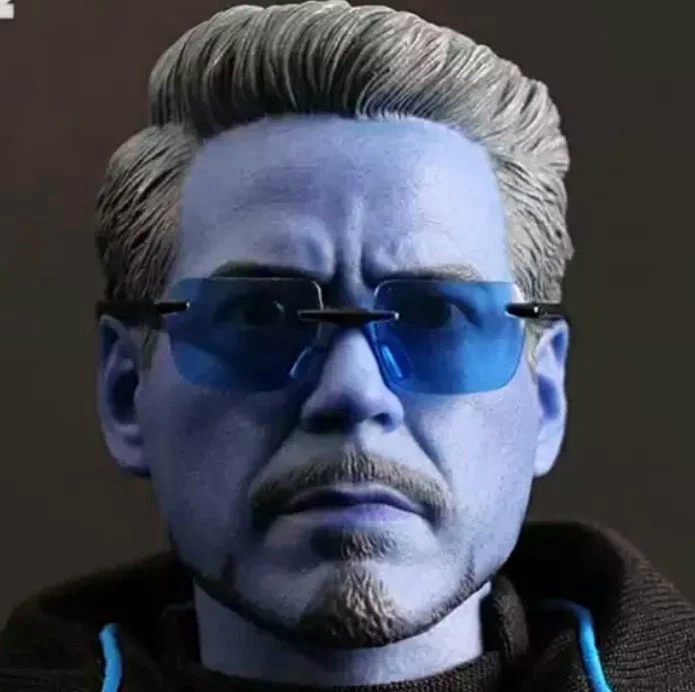

In [0]:
from google.colab.patches import cv2_imshow
x1 = imread('https://raw.githubusercontent.com/prajnaraipn7/new/master/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg')
cv2_imshow(x1)

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))